# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

plt.rc("figure", figsize=(15, 8))
sns.set(style="darkgrid")

## Parte 1

### _Setup_ da parte 1

In [57]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [58]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [59]:
dataframe.shape

(10000, 2)

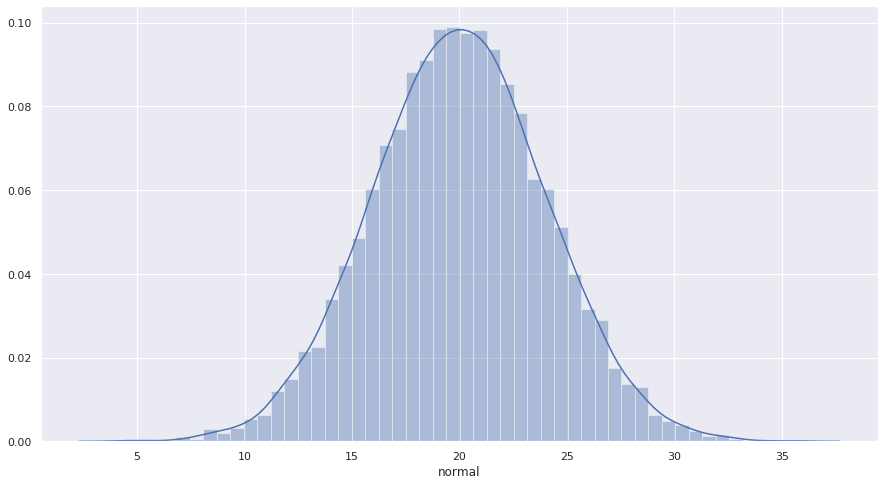

In [60]:
sns.distplot(dataframe.normal)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [61]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q_norm = dataframe["normal"].quantile([0.25, 0.50, 0.75])
    q_binom = dataframe["binomial"].quantile([0.25, 0.50, 0.75])

    diferenca = tuple( (q_norm - q_binom).round(decimals=3) )
    
    return diferenca

In [62]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

# Justificativa

De acordo com a teoria, podemos aproximar uma distribuição binomial X ~ (n, p) com parâmetros n e p, por uma distribuição normal com parâmetros Y~(mi, sigma²), onde  mi = n.p e sigma² = n.p.(1 - p).     
      
Vamos verificar estas igualdades abaixo:

## Verificando a média mu

In [63]:
# "binomial": sct.binom.rvs(100, 0.2, size=10000)
# daqui tiramos que n = 100 e p = 0.2

n, p = 100, 0.2
n * p, dataframe.normal.mean()

(20.0, 19.991456066526293)

## Verificando o sigma

In [64]:
n*p*(1-p), dataframe.normal.var()

(16.0, 16.110987985368915)

## Podemos observar como essas duas distribuições se aproximam uma da outra através do gráfico abaixo

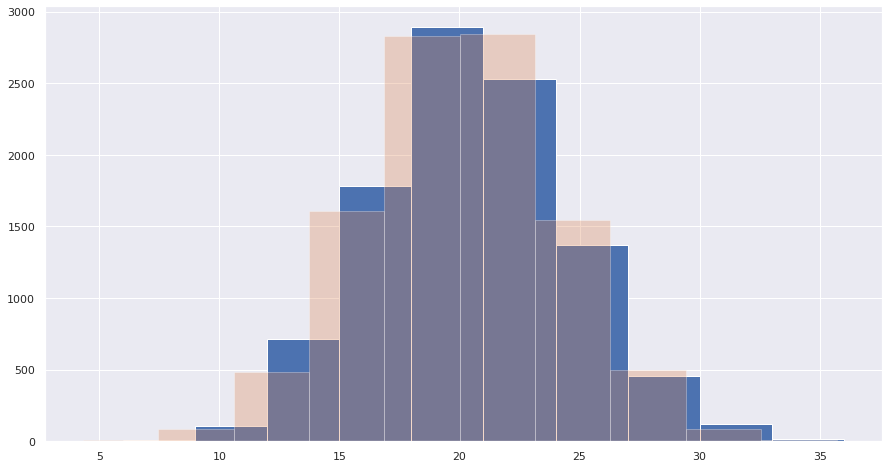

In [65]:
plt.hist(dataframe["binomial"])
plt.hist(dataframe["normal"], alpha=0.3)
plt.show()

## Plotando no mesmo gráfico as funções de probabilidade e densidade de probabilidade das distribuições binomial e normal respectivamente, com os parâmetros passados no probelma.

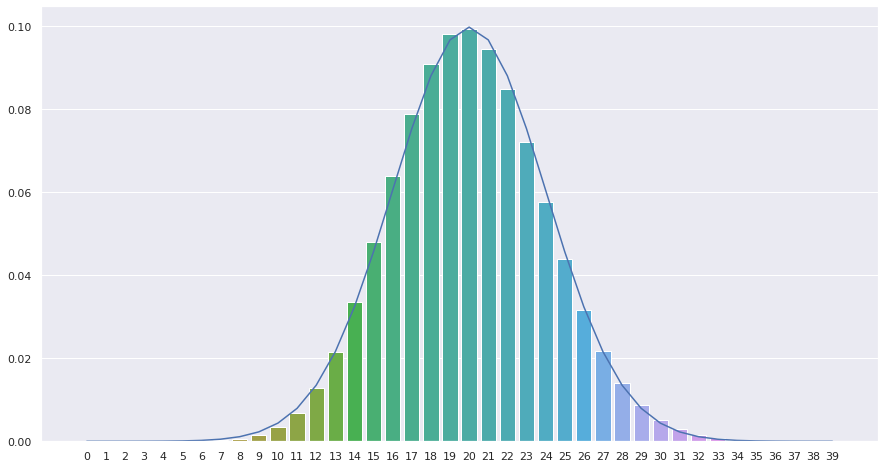

In [66]:
x = np.arange(0, 40)
sns.barplot(x=x, y=sct.binom.pmf(x,100, 0.2))
sns.lineplot(x, sct.norm.pdf(x, loc=20, scale=4))
plt.show()

Nota-se, nitidamente, o quão boa pode ser uma boa aproximação de uma distribuição binomial à partir de um distribuição normal.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [67]:
def q2():
    media  = dataframe["normal"].mean()
    desvio = dataframe["normal"].std()
    
    ecdf = ECDF(dataframe["normal"])
    
    probabiliade = round((ecdf(media + desvio) - ecdf(media - desvio)), 3)
    
    return probabiliade

In [68]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [69]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()
    
    return ((m_binom - m_norm).round(3), (v_binom - v_norm).round(3))

In [70]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [71]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [72]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [73]:
stars.shape

(17897, 9)

In [74]:
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [75]:
stars.mean_profile.describe()

count    17897.000000
mean       111.078321
std         25.652705
min          5.812500
25%        100.929688
50%        115.078125
75%        127.085938
max        192.617188
Name: mean_profile, dtype: float64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [76]:
def q4():
    # Retorne aqui o resultado da questão 4.
    false_pulsar_mean_profile_standardized = sct.zscore(stars.loc[stars.target == 0, 'mean_profile'])
    
    quartis = sct.norm.ppf([0.8, 0.90, 0.95])
     
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    return (ecdf([quartis][0]).round(3))

In [77]:
q4()

array([0.806, 0.911, 0.959])

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [78]:
def q5():
    # Retorne aqui o resultado da questão 5.
    false_pulsar_mean_profile_standardized = sct.zscore(stars.query("target == 0")["mean_profile"])
    
    quartis = np.quantile(false_pulsar_mean_profile_standardized, [0.25, 0.50, 0.75])
    probabilidade_quartis = sct.norm.ppf([0.25, 0.50, 0.75])
    
    diferenca = np.round( (quartis - probabilidade_quartis), 3 )
   
    return diferenca

In [79]:
q5()

array([ 0.027,  0.04 , -0.004])

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.